### Kelly Criterion Bet

The Kelly Criterion is used to determine the optimal fraction of wealth to bet in order to maximize long-term growth. Given the following parameters:
- \{ p \} is the probability of winning the bet,
- \{ b \} is the factor of wealth won after each bet (refer to Kelly-Criterion Theory.pdf),
- \{ N \} is the number of rounds,
- \{ x \} is the proportion of wealth bet,
- \{ wealth \} is the initial wealth  \( at t = 0 \).

These parameters can be adjusted below.

In [2]:
p = 0.6
b = 1
N = 300
x = 0.2
wealth = 25

In [18]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

The following code chunk represents a single simulation of N rounds of betting.  Furthermore, an ndarray of betting proportions, x, is passed through to determine which betting proportion finds the most success on this specific path of success vs failures.

In [12]:
x = list(np.linspace(0,1,11))
x = [float(f'{k:.2f}') for k in x]
print(x)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


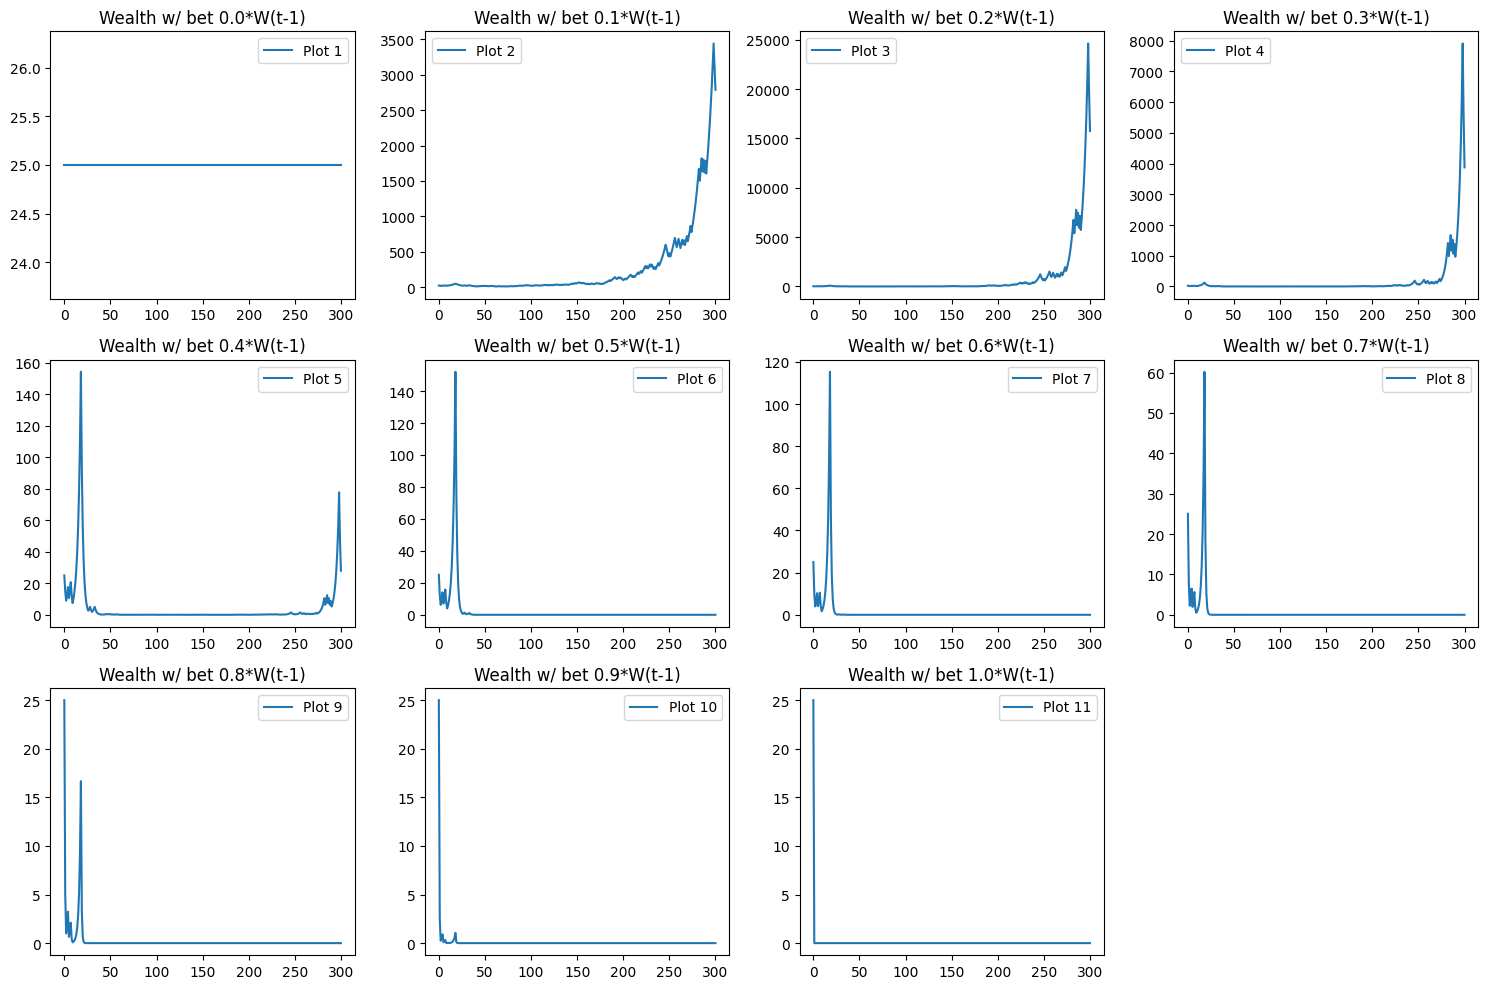

In [14]:
data = {xi:{"wealth":wealth,"balance change":[wealth]} for xi in x}
rv_bool = lambda x: True if x<=p else False

win_bool = []
for round in range(N):
  rv = random.uniform(0,1)
  for xi in x:
    win_bool.append(rv_bool(rv))
    if rv <= p: #success = won bet
      data[xi]['wealth'] += b*xi*(data[xi]['wealth'])
      data[xi]['balance change'].append(data[xi]['wealth'])
    else: #failure = lost bet
      data[xi]['wealth'] -= xi*(data[xi]['wealth'])
      data[xi]['balance change'].append(data[xi]['wealth'])

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
  if i/10 <= 1.0:
    ax.plot(range(N+1), data[i/10]['balance change'], label=f"Plot {i+1}")
    ax.legend()
    ax.set_title(f"Wealth w/ bet {i/10}*W(t-1)")
fig.delaxes(axes.flat[-1])
plt.tight_layout()

As the betting proportion x varies between 0 and 1, we observe that as x approaches its upper bound, wealth inevitably converges to zero for large N. This highlights the risk of overbetting, which leads to financial ruin over time.

However, there appears to be an optimal range for x, likely between 0.1 and 0.3, where final wealth is maximized. The output below, from the dictionary finalized_dict, presents the final wealth corresponding to each betting proportion and the overall win %. Here, the keys represent the chosen betting proportions, while the values indicate the resulting wealth after N rounds.

In [25]:
finalized_dict = {}
finalized_dict["win %"] = float(f"{np.array(win_bool).mean()*100:.2f}")
for xi in list(data.keys()):
  finalized_dict[xi] = f"final wealth is {data[xi]['wealth']:.3f}"
finalized_dict

{'win %': 60.33,
 0.0: 'final wealth is 25.000',
 0.1: 'final wealth is 2785.317',
 0.2: 'final wealth is 15756.291',
 0.3: 'final wealth is 3875.730',
 0.4: 'final wealth is 27.997',
 0.5: 'final wealth is 0.003',
 0.6: 'final wealth is 0.000',
 0.7: 'final wealth is 0.000',
 0.8: 'final wealth is 0.000',
 0.9: 'final wealth is 0.000',
 1.0: 'final wealth is 0.000'}

Now, we simulate Q sessions where each session has N rounds of betting.  Once again, the parameters can be adjusted below.

In [26]:
p = 0.6
b = 1
N = 300
x = 0.2
wealth = 25
Q = 100 #number of sessions played

simulations = []
for s in range(Q):
  x = list(np.linspace(0,1,11))
  x = [float(f'{k:.2f}') for k in x]
  data = {xi:{"wealth":wealth,"balance change":[wealth]} for xi in x}
  rv_bool = lambda x: True if x<=p else False
  win_bool = []
  for round in range(N):
    rv = random.uniform(0,1)
    for xi in x:
      win_bool.append(rv_bool(rv))
      if rv <= p: #success = won bet
        data[xi]['wealth'] += b*xi*(data[xi]['wealth'])
        data[xi]['balance change'].append(data[xi]['wealth'])
      else: #failure = lost bet
        data[xi]['wealth'] -= xi*(data[xi]['wealth'])
        data[xi]['balance change'].append(data[xi]['wealth'])
  finalized_dict = {}
  finalized_dict["win %"] = float(f"{np.array(win_bool).mean()*100:.2f}")
  for xi in list(data.keys()):
    finalized_dict[xi] = float(f"{data[xi]['wealth']:.3f}")
  simulations.append(finalized_dict)

The list "simulations" contains Q sessions.  We now can use this list to conduct further analysis and come to conclusions.